In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

In [4]:
# 2. Loading Dataset
file_path = r"C:\Users\Rob\Documents\airline_passenger_satisfaction.csv"
df = pd.read_csv(file_path)

In [31]:
# Exploring data
print("\n--- Dataset Shape ---")
print(df.shape)

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Checking columns available in the DataFrame
print("\n--- Available Columns ---")
print(df.columns.tolist())


--- Dataset Shape ---
(129880, 29)

--- First 5 Rows ---
   ID  Gender  Age  Customer Type  Type of Travel  Class  Flight Distance  \
0   1       1   48              0               0      0              821   
1   2       0   35              1               0      0              821   
2   3       1   41              1               0      0              853   
3   4       1   50              1               0      0             1905   
4   5       0   49              1               0      0             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  In-fligh

In [6]:
# Data Cleaning

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Removing duplicate rows if any
df.drop_duplicates(inplace=True)

# Converting categorical columns with Label Encoding
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

print("\n--- Data After Cleaning ---")
print(df.head())



--- Data After Cleaning ---
   ID  Gender  Age  Customer Type  Type of Travel  Class  Flight Distance  \
0   1       1   48              0               0      0              821   
1   2       0   35              1               0      0              821   
2   3       1   41              1               0      0              853   
3   4       1   50              1               0      0             1905   
4   5       0   49              1               0      0             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg R

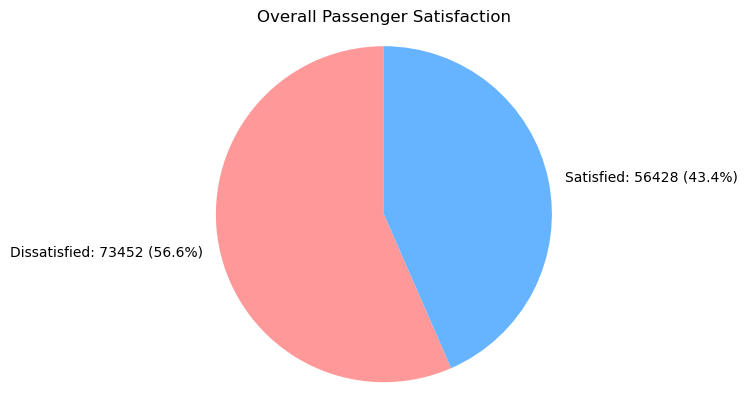

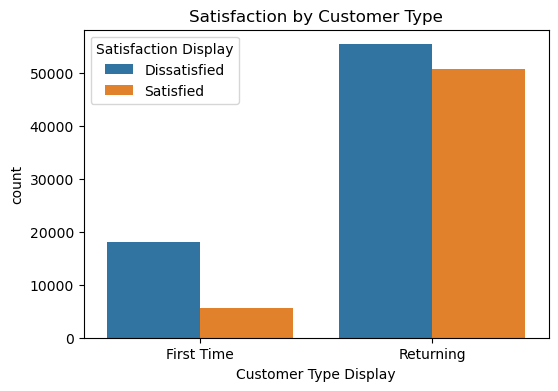

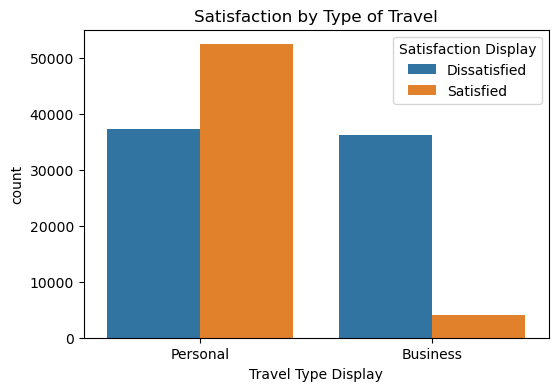

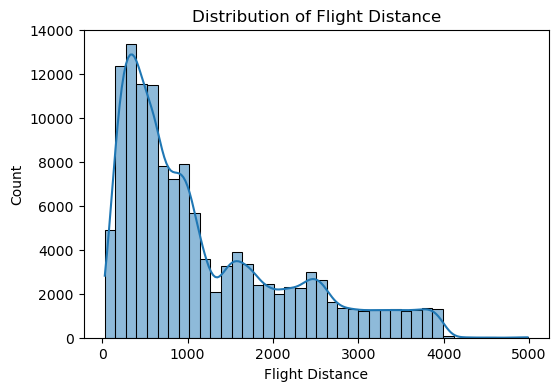

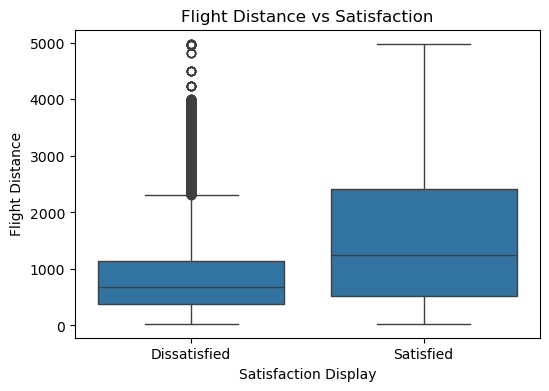

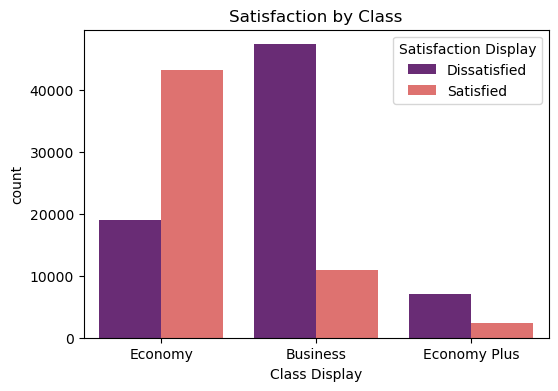

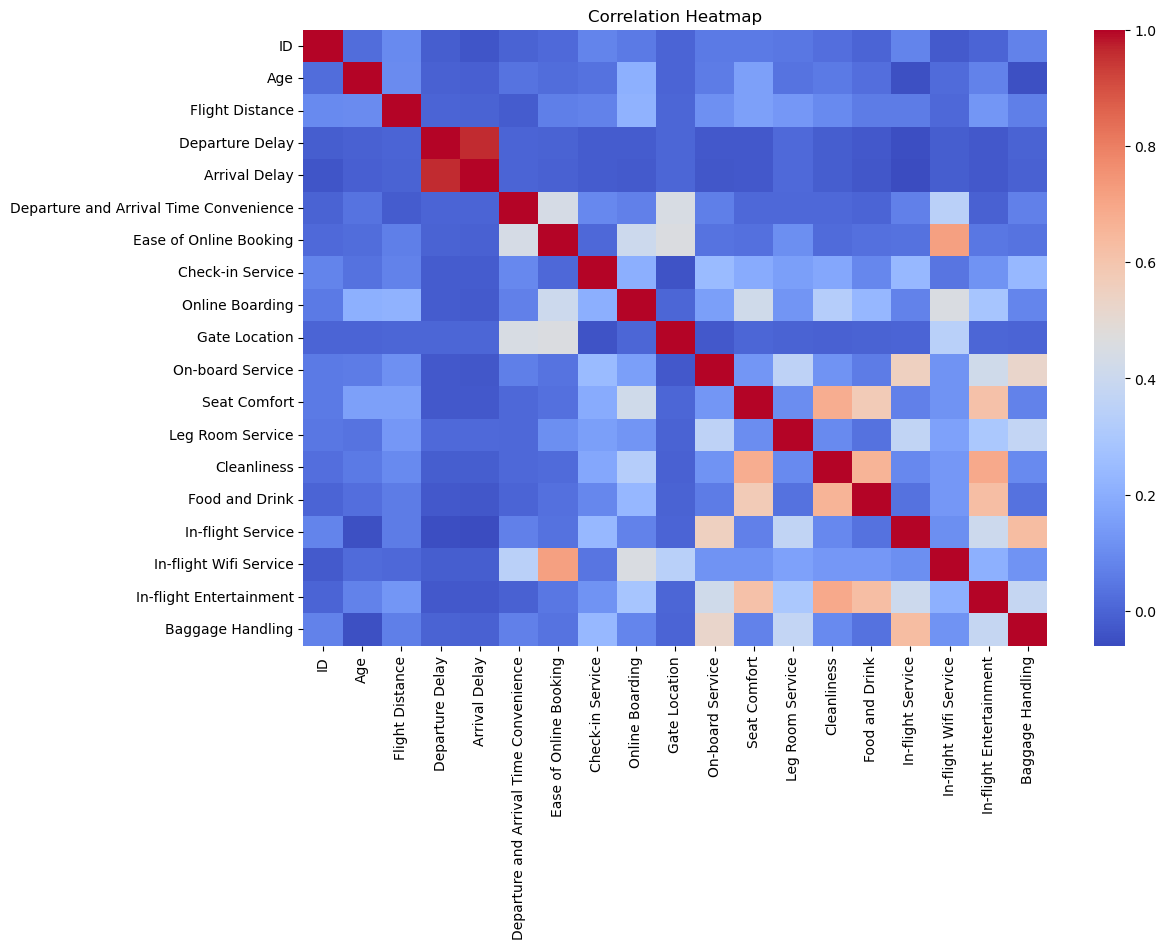

In [30]:

df['Satisfaction Display'].value_counts()
labels = [f"{cat}: {count} ({count/len(df)*100:.1f}%)" for cat, count in satisfaction_counts.items()]
plt.pie(satisfaction_counts, labels=labels, autopct='', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Overall Passenger Satisfaction")
plt.axis('equal')  
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Customer Type Display', hue='Satisfaction Display', data=df)
plt.title("Satisfaction by Customer Type")
plt.show()

# Using the new display column for the travel type plot
plt.figure(figsize=(6,4))
sns.countplot(x='Travel Type Display', hue='Satisfaction Display', data=df)
plt.title("Satisfaction by Type of Travel")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Flight Distance'], bins=40, kde=True)
plt.title("Distribution of Flight Distance")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Satisfaction Display', y='Flight Distance', data=df)
plt.title("Flight Distance vs Satisfaction")
plt.show()

# Satisfaction by Class 
class_map = {0: 'Economy', 1: 'Business', 2: 'Economy Plus'}  
df['Class Display'] = df['Class'].map(class_map)

# Satisfaction by Class using the display names
plt.figure(figsize=(6,4))
sns.countplot(x="Class Display", hue="Satisfaction Display", data=df, palette="magma")
plt.title("Satisfaction by Class")
plt.show()

# Converting categorical variables to numeric using one-hot encoding
df_corr = df.copy()

# Select only numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns
df_corr_numeric = df_corr[numeric_cols]


# Applying one-hot encoding
categorical_cols = ['Customer Type Display', 'Satisfaction Display', 'Travel Type Display', 'Class Display']
df_corr = pd.get_dummies(df_corr, columns=categorical_cols, drop_first=True)

# selecting numeric columns
df_corr_numeric = df_corr.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(df_corr_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# 6. Statistical Insights
print("\n--- Satisfaction Percentage ---")
satisfaction_rate = df['Satisfaction'].value_counts(normalize=True) * 100
print(satisfaction_rate)

print("\n--- Satisfaction by Customer Type ---")
customer_satisfaction = df.groupby("Customer Type")['Satisfaction'].mean()
print(customer_satisfaction)

print("\n--- Satisfaction by Travel Type ---")
travel_satisfaction = df.groupby("Type of Travel")['Satisfaction'].mean()
print(travel_satisfaction)

print("\n--- Average Flight Distance by Satisfaction ---")
distance_comparison = df.groupby("Satisfaction")['Flight Distance'].mean()
print(distance_comparison)


--- Satisfaction Percentage ---
Satisfaction
0    56.553742
1    43.446258
Name: proportion, dtype: float64

--- Satisfaction by Customer Type ---
Customer Type
0    0.239697
1    0.478115
Name: Satisfaction, dtype: float64

--- Satisfaction by Travel Type ---
Type of Travel
0    0.583724
1    0.101326
Name: Satisfaction, dtype: float64

--- Average Flight Distance by Satisfaction ---
Satisfaction
0     929.715420
1    1529.539165
Name: Flight Distance, dtype: float64


['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction', 'Customer Type Display', 'Satisfaction Display', 'Travel Type Display']

--- Logistic Regression Performance ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22036
           1       1.00      1.00      1.00     16928

    accuracy                           1.00     38964
   macro avg       1.00      1.00      1.00     38964
weighted avg       1.00      1.00      1.00     38964


--- Random Forest Performance ---
Accuracy: 1.0
              precision    recall  f1-score   suppo

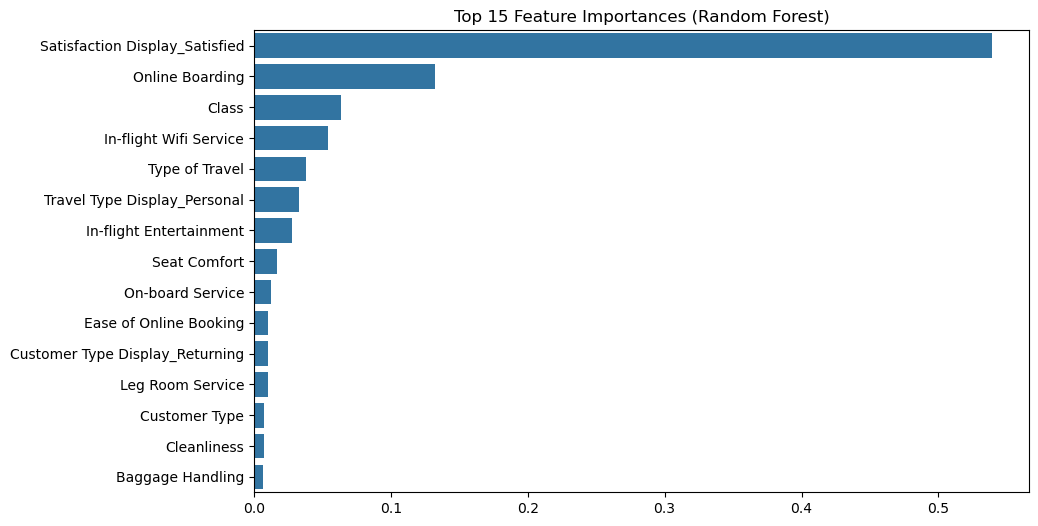

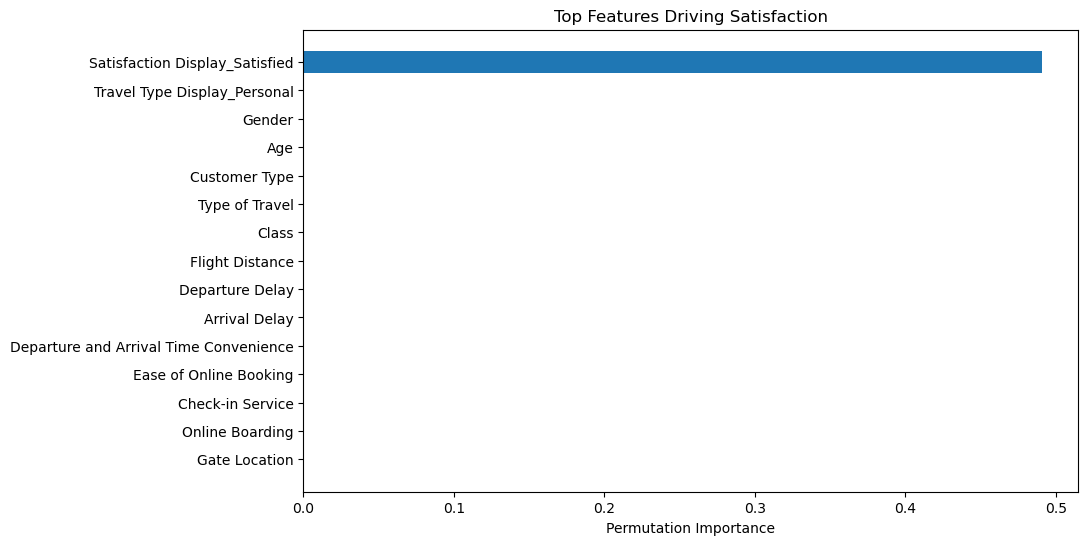

In [20]:
# Predicting Satisfaction

print(df.columns.tolist())  

# Features and target
X = df.drop("Satisfaction", axis=1)  
y = df["Satisfaction"]  


# Converting categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\n--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n--- Random Forest Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
# Use feature names from the transformed dataset
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"feature {i}" for i in range(X.shape[1])]
sns.barplot(x=importances[indices][:15], y=[feature_names[i] for i in indices][:15])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

# Permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,6))
# Use feature names from the transformed dataset
plt.barh([feature_names[i] for i in sorted_idx][-15:], perm_importance.importances_mean[sorted_idx][-15:])
plt.xlabel("Permutation Importance")
plt.title("Top Features Driving Satisfaction")
plt.show()







